# Assigment 2


---


## Part 1 - optimizing Egg holder function

f(x,y)=-(y+47)sin⁡√(|x/2+(y+47)| )-x sin⁡√(|x-(y+47)| ),-10000<x,y<10000

<p align="center">
<img src="https://upload.wikimedia.org/wikipedia/commons/thumb/e/e7/Eggholder_function.pdf/page1-800px-Eggholder_function.pdf.jpg" width="450" height="250" /></p>

### Working 

<p align="center">
<img src="https://pablormier.github.io/assets/img/de/ackley.gif" width="450" height="250" />
</p>

### Task1 : Hill Climbing Search

<p align="center">
<img src="http://donsoft.io/deep-learning-with-rnns/images/gradient_descent_cropped.gif" width="450" height="250" />
</p>

<!--#![eggHolder Function](https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcTlm9RK2p4jdG8-_Il0xhLpT1xq-hXynkWGzFu5pUes0JL4HJDD)
#![Hill Climbing](http://donsoft.io/deep-learning-with-rnns/images/gradient_descent_cropped.gif)
#![eggholder 1](https://pablormier.github.io/assets/img/de/ackley.gif)-->

Implement a Hill Climbing (descending) algorithm to find the global minimum of the Eggholder’s function. Adopt a maximum step size of 1.0. A new position (x’, y’) can be generated from old position (x, y) by x’ = (rand() – 0.5)*0.1 + x and y’ = (rand() – 0.5)*1.0 + y, where rand() is a uniform random number generation function generating random numbers in [0, 1).


Randomly generate an initial position. Use the Hill Climbing algorithm to optimize the Eggholder’s function starting from the initial position. Terminate the optimization process when a better position yielding lower objective function value is not found in the last 100 steps. Repeat this process for 100 runs. Display the distribution of the minima you found in each run on a figure.


In [1]:
import math
import random
import numpy as np

def initializeParameters():
  x = np.random.randint(10)
  y = np.random.randint(10)
  return x,y

def eggholderFunc(x=0,y=0):
  return (-(y+47)*np.sin(np.sqrt(abs((x/2)+(y+47))))-x*np.sin(np.sqrt(abs(x-(y+47)))))

def climb(x=0,y=0):
  cost = eggholderFunc(x,y)
  dx = (random.uniform(0, 1) - 0.5)*0.1 + x
  dy = (random.uniform(0, 1) - 0.5)*0.1 + y
  grads={
      "dx":dx,
      "dy":dy
  }
  return cost,grads

def hillclimbing(x,y,step_size=1.0,num_iterations=100,printCost=False):
  costs = []
  globalMin = 1000
  for i in range(num_iterations):
    cost,grads = climb(x,y)
    #--- Check for global minimum
    costs.append(cost)
    if cost<globalMin:
      if printCost:
        print("Cost for X : %f, Y : %f after iteration %i: %f" %(x, y, i, cost))
      globalMin = cost
      minx = x
      miny = y
      #costs.append(cost)
      #update position
      x = grads["dx"]
      y = grads["dy"]
    #x = x - step_size*grads["dx"]
    #y = y - step_size*grads["dy"]
  global_vals = {"global_minima" : globalMin,"global_x": minx,"global_y":miny}
  positions = {"x":x,"y":y}
  return costs,positions,global_vals

In [2]:
x,y = initializeParameters()
costs,positions,globalVals = hillclimbing(x,y,1.0,100,True)
print('X: ',x,'Y : ',y)
print('updated X,Y positions are : ',positions["x"],positions["y"])
print('Global minima : %f, for values (%f,%f)'%(globalVals["global_minima"],globalVals["global_x"],globalVals["global_y"]))

Cost for X : 4.000000, Y : 9.000000 after iteration 0: -57.620178
X:  4 Y :  9
updated X,Y positions are :  4.025147676570273 8.974652293739755
Global minima : -57.620178, for values (4.000000,9.000000)


In [3]:
import matplotlib.pyplot as plt
def plotCosts(costs):
  #Displaying the line chart for minimum in each run
  fig = plt.figure(figsize=(55,12))
  ax1 = fig.add_subplot(221)
  ax1.plot(list(range(len(costs))),costs,'k', color='r')
  plt.xticks(list(range(len(costs))))
  plt.xticks(rotation=90)
  plt.xlabel('Number of runs')
  plt.show()

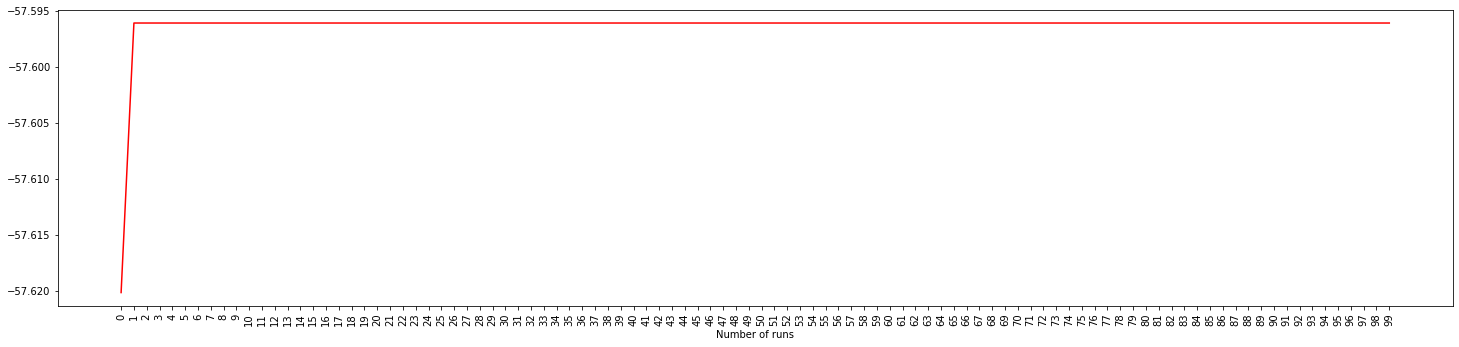

In [4]:
plotCosts(costs)

### Task 2. Differential Evolution	

<p align="center">
<img src="https://pablormier.github.io/assets/img/de/curve-fitting.gif" width="450" height="250" />
</p>

<!--- ![Differential Evolution](https://pablormier.github.io/assets/img/de/curve-fitting.gif) --->

Implement a Differential Evolution algorithm to find the global minimum of the Eggholder’s function. Terminate the optimization process when a better position yielding lower objective function value is not found in the last 100 steps. Repeat this process for 100 runs. Display the distribution of the minima you found in each run on a figure.

***Algorithm***

Initialize parameters np, nc, F, and CR

Initialize population $𝑿_{𝒋,𝒊}^{𝟏}$ , j = 1, …, d, i = 1, …, np

For k = 1 to nc

	𝑿^(𝟎) = 𝑿^(𝟏)

	For i = 1 to np

		Generate integer random numbers r0, r1, r2{1, …, np} while r0 ≠ r1 ≠ r2 ≠ i

		Compute the mutant vector 𝑽=𝑿_𝒓𝟎^((𝟎))+𝑭(𝑿_𝒓𝟏^((𝟎) )−𝑿_𝒓𝟐^((𝟎) ))

		For j = 1 to d

			generate a uniform random number u from [0, 1)

			if u < CR then 𝑼_𝒋=𝑽_𝒋 else 𝑼_𝒋=𝑿_(𝒋,𝒊)^((𝟎))

		End for

	if 𝒇(𝑼)<𝒇(𝑿_𝒊^((𝟎) )) then 𝑿_𝒊^((𝟏) )=𝑼 else 𝑿_𝒊^((𝟏) )=𝑿_𝒊^((𝟎) )

	End for

End for


***Parameters*** : 

*   Np - population size
      - recommended for 10 times the number of parameters(dimensions)
*   Nc - number of cycles
*   CR - Crossover and recombination probability[0,1)
      - Higher Value : faster convergence
      - lower value : better convergence
*   F = differential weight [0,2]
      - Recommended F = 0.8
      - recent study shows that F as a random number of [0.5,1] improves convergence



In [5]:
import random
import numpy as np

def inititalizePopulation(popSize,bounds):
  population = []
  for i in range(0,popSize):
        indv = []
        for j in range(len(bounds)):
            indv.append(random.uniform(bounds[j][0],bounds[j][1]))
        population.append(indv)
  return population 

def eggholder(x):
  return (-(x[1] + 47) * np.sin(np.sqrt(abs(x[0]/2 + (x[1]  + 47))))-x[0] * np.sin(np.sqrt(abs(x[0] - (x[1]  + 47)))))

def validateboundary(vector, bounds):
  boundaryVector = []
  for i in range(len(vector)):
    # variable exceedes the minimum boundary
    if vector[i] < bounds[i][0]:
            boundaryVector.append(bounds[i][0])

    # variable exceedes the maximum boundary
    if vector[i] > bounds[i][1]:
            boundaryVector.append(bounds[i][1])

    # the variable is fine
    if bounds[i][0] <= vector[i] <= bounds[i][1]:
            boundaryVector.append(vector[i])
    return boundaryVector

def recombination(positionVector, Mutantvector, cr):
  v_recomb = []
  crossover = random.random()
  for i in range(0,len(positionVector)):
    # recombination occurs when crossover <= recombination rate
    if crossover <= cr:
      v_recomb.append(Mutantvector[i])
    # recombination did not occur
    else:
      v_recomb.append(positionVector[i])
  return v_recomb

def diffEvolution(bounds, costFunc, popSize, cr, F=0.8, num_iterations=100, printCost = False):
  generationCosts = {}
  x1 = inititalizePopulation(popSize, bounds)
  print()
  for k in range(num_iterations):
    x0 = x1
    for i in range(popSize):
      #--- Generate 3 random numbers(r0,r1,r2) while r0!=r1!=r2!=i
      #--- compute mutant vector v = x0r0 + F(x0r1-x0r2)
      # select three random vector index positions [0, popsize), not including current vector (j)
      canidates = list(range(0,popSize))
      canidates.remove(i)
      random_index = random.sample(canidates, 3)
      r0 = x0[random_index[0]]
      r1 = x0[random_index[1]]
      r2 = x0[random_index[2]]
      mutationVector = np.add(r0,(F*np.subtract(r1,r2)))
      #mutationVector = validateboundary(mutationVector, bounds)
      positionVector = x0[i]
      recombinationVector = recombination(positionVector, mutationVector, cr)
      fitnessPosition = costFunc(positionVector)
      fitnessRecombination = costFunc(recombinationVector)
      if fitnessRecombination < fitnessPosition:
        x1[i] = recombinationVector
        generationCosts[k] = fitnessRecombination
        print('> Vector : {}, Fitness : {}'.format(str(recombinationVector),fitnessRecombination))
      else:
        generationCosts[k] = fitnessPosition
        print('> Vector : {}, Fitness : {}'.format(str(positionVector),fitnessPosition))
  #--------- get optimal score and vector--------#
  costsOnly = list(generationCosts.values())
  minCost = min(costsOnly)
  print("Minimum Cost after 100 iterations : ",minCost)
  return minCost,generationCosts




In [6]:
minCost,generationCosts = diffEvolution([(-1,1),(-1,1)], eggholder, 10, 0.7, 0.8, 100,True)



> Vector : [0.039741707968325435, 0.6324152308159878], Fitness : -27.694334309060938
> Vector : [-0.1454972835510795, 0.5198234818964198], Fitness : -26.942774709427837
> Vector : [0.6021636437674787, -0.043308167601672665], Fitness : -26.475310812523905
> Vector : [0.37535493319815183, -0.4676507026424206], Fitness : -24.58540619998742
> Vector : [0.30778277460949544, -0.11887086419213833], Fitness : -25.655072375181167
> Vector : [-0.637528567269456, -0.14941265255853642], Fitness : -23.652590935104318
> Vector : [0.6087542099677334, 0.783690320037669], Fitness : -29.306418219169345
> Vector : [-0.4070801414308241, 0.9284898768108301], Fitness : -27.795711786331317
> Vector : [0.22118867642378692, 0.9718892588485861], Fitness : -29.19866925581428
> Vector : [0.5328883652189118, 0.8292999308309069], Fitness : -29.317125916555746
> Vector : [0.039741707968325435, 0.6324152308159878], Fitness : -27.694334309060938
> Vector : [-0.1454972835510795, 0.5198234818964198], Fitness : -26.9427

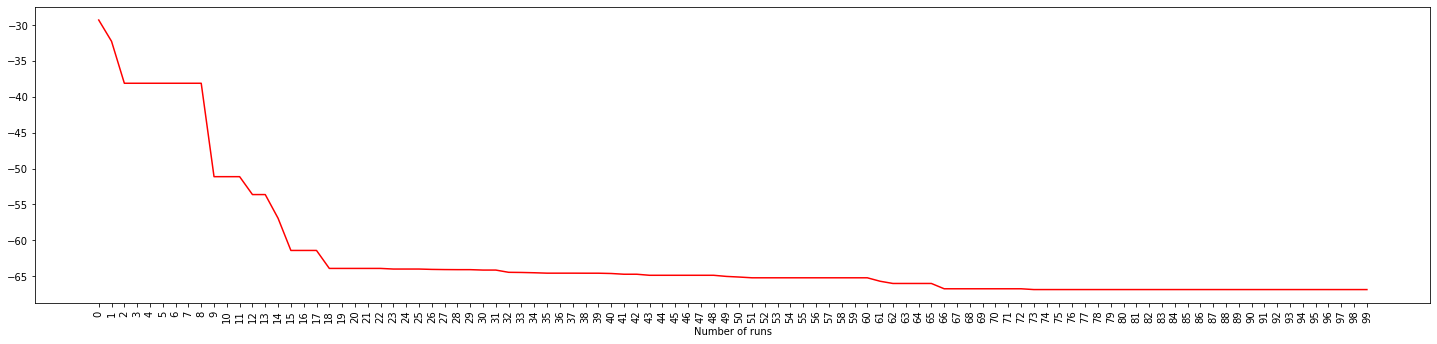

In [7]:
costs = list(generationCosts.values())
plotCosts(costs)

### Differential Evolution using Library 

package scipy : scipy.optimize - differential_evolution


***Genetic Algorithm VS Differential Evolution***

<p align="center">
<img src="https://image.slidesharecdn.com/graduationthesis-121206043922-phpapp01/95/week9-6-638.jpg?cb=1354768807"  height="250" />

In [8]:
from scipy.optimize import differential_evolution
#x,y = initializeParameters()
print('X: ',x,'Y : ',y)
results = differential_evolution(eggholder,bounds=[(x,y)]*5,maxiter=100,popsize=10,disp=True)
print()
print(results)

X:  4 Y :  9
differential_evolution step 1: f(x)= -60.1132
differential_evolution step 2: f(x)= -60.3657
differential_evolution step 3: f(x)= -60.4833
differential_evolution step 4: f(x)= -60.5435
differential_evolution step 5: f(x)= -60.6031
differential_evolution step 6: f(x)= -60.6183
differential_evolution step 7: f(x)= -60.6645
differential_evolution step 8: f(x)= -60.6645
differential_evolution step 9: f(x)= -60.6899

     fun: -60.71455295038492
     jac: array([-0.12628334, -1.82149975,  0.        ,  0.        ,  0.        ])
 message: 'Optimization terminated successfully.'
    nfev: 512
     nit: 9
 success: True
       x: array([9.        , 9.        , 6.13589237, 6.70512232, 7.06962561])


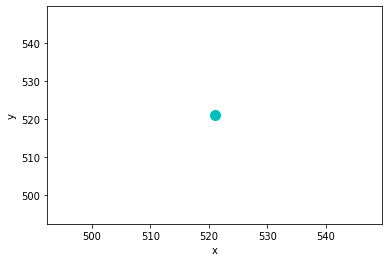

In [9]:
fig = plt.figure()
ax = fig.add_subplot(111)
#im = ax.imshow(eggholder(x), interpolation='bilinear', origin='lower',cmap='gray')
ax.set_xlabel('x')
ax.set_ylabel('y')
def plot_point(res, marker='o', color=None):
    ax.plot(512+res.x[0], 512+res.x[1], marker=marker, color=color, ms=10)
plot_point(results, color='c')
plt.show()

In [10]:
y = [ np.random.randint(10) for i in range(0,5)]
print(y)

[2, 1, 0, 5, 6]


## Part 2 - N-queens Problem

<!-- <p align="center">
<img src="https://upload.wikimedia.org/wikipedia/commons/1/1f/Eight-queens-animation.gif" width="250" height="250" />
</p> -->

<!--![Nqueens](https://upload.wikimedia.org/wikipedia/commons/1/1f/Eight-queens-animation.gif)-->

### Task 1. Hill Climbing Search

<p align="center">
<img src="https://i.imgur.com/O3cGlYv.gif" width="250" height="250" />
</p>

<!--![HillClimbing](https://i.imgur.com/O3cGlYv.gif)-->

Implement a Hill Climbing Search algorithm to find a solution of the N-queens problem from a random given position. Use the number of pairwise attacks as the objective function.  Repeat the program 100 times for N = 8, N = 16, and N = 32 and show how many times you can find the solutions. Plot the initial state and the final state (not necessary the solution) of the first 10 times.



In [11]:
"""
N-Queens using Hill Climbing 
Objective function - number of pairwise attacks



1d-array : representing 2d array
[1, 3, 0, 2]


3 .  x  .  .  
2 .  .  .  x
1 x  .  .  .  
0 .  .  x  .
  0  1  2  3  

"""
import numpy as np
import random
from math import sqrt


"""
function 
  returns number of queens and boardSize
"""
def getDetails():
  queens = int(input("Enter the number of queens (4,8,16,32) : "))
  return queens 

def generateSequence(n_queens):
  sequence = [ np.random.randint(1, n_queens) for queen in range(0,n_queens) ]
  return sequence

def getXY(index, width):
  x = int((index-1) / width)
  y = int((index-1) % width)
  return x,y


def ObjectiveFunction(sequence):
  horizontal_collisions = 0
  horizontal_collisions = sum([sequence.count(queen)-1 for queen in sequence])//2
  diagonal_collisions = 0
  n = len(sequence)
  left_diagonal = [0] * 2*n
  right_diagonal = [0] * 2*n
  for i in range(n):
    left_diagonal[i + sequence[i] - 1] += 1
    right_diagonal[len(sequence) - i + sequence[i] - 2] += 1
  for i in range(2*n-1):
    counter = 0
    if left_diagonal[i] > 1:
      counter += left_diagonal[i]-1
    if right_diagonal[i] > 1:
      counter += right_diagonal[i]-1
    diagonal_collisions += counter #/ (n-abs(i-n+1))
  #print('diagonal_collisions : ',diagonal_collisions)
  #print('horizontal_collisions : ',horizontal_collisions) 
  return int(horizontal_collisions + diagonal_collisions) #28-(2+3)=23
  


def successor(sequence, fitness, visited):
  #neighbour_cost = 1000
  successor = []
  for i in range(0,100):
    neighbour = generateSequence(len(sequence))
    neighbour_cost = ObjectiveFunction(neighbour) #--- get the cost of visited node
    n_state = ''.join(str(e) for e in neighbour)
    #print(n_state)
    if n_state not in visited:                   #---- check if the state is already visited ???
      n_state = ''.join(str(e) for e in neighbour)
      visited.add(n_state)                   #---- add new neighbour to visited set
      #print(n_state)
      if(neighbour_cost < fitness):            #---- if cost is less than the previous fitness
        fitness = neighbour_cost               #---- update current fitness to be same as neighbour cost
        successor = neighbour
  #print('State : ',neighbour,' Fitness : ',fitness)
  next_State  = {'state':successor,
                'fitness': fitness}            #---- update the next_state
  return next_State


def hillclimbing(sequence, fitness, num_iterations=100, printCost=False):
  costs = []
  globalMin = 1000
  visited = set()
  state = ''.join(str(e) for e in sequence)
  visited.add(state)
  for i in range(num_iterations):
    nextState = successor(sequence, fitness, visited)
    cost,grads = nextState['fitness'],nextState['state']
    costs.append(cost)
    #--- Check for global minimum
    if cost<globalMin:
      globalMin = cost
      #costs.append(cost)
      final_sequence = grads
      if printCost:
        print('Cost for ',final_sequence,' after iteration %i: %f' %(i, globalMin))
  global_vals = {"global_minima" : globalMin,"global_sequence": final_sequence}
  positions = {"sequence":final_sequence}
  return costs,positions,global_vals 

def printBoard(sequence):
  board = []
  nQ = len(sequence)
  for x in range(nQ):
    board.append(["x"] * nQ)
  for i in range(nQ):
    board[nQ-sequence[i]][i]="Q"
  board = board[::-1]
  print(sequence)
  for row in board:
    print (" ".join(row))


In [12]:
nQ = getDetails()
sequence=generateSequence(nQ)
fitness = ObjectiveFunction(sequence)
costs,positions,globalVals = hillclimbing(sequence, fitness, 100, True)
print('Initial Sequence : ',sequence,' with fitness : ',fitness)
print('Final Sequence after 100 iterations : ',positions["sequence"])
print('Global minima : %f'%(globalVals["global_minima"]))
final = positions["sequence"]

printBoard(sequence)
printBoard(final)

Enter the number of queens (4,8,16,32) :  8


Cost for  [1, 3, 6, 3, 6, 2, 5, 5]  after iteration 0: 4.000000
Cost for  [4, 2, 4, 7, 1, 3, 5, 2]  after iteration 1: 3.000000
Cost for  [5, 7, 3, 6, 2, 7, 1, 4]  after iteration 14: 2.000000
Initial Sequence :  [4, 6, 7, 6, 1, 3, 3, 2]  with fitness :  7
Final Sequence after 100 iterations :  [5, 7, 3, 6, 2, 7, 1, 4]
Global minima : 2.000000
[4, 6, 7, 6, 1, 3, 3, 2]
x x x x Q x x x
x x x x x x x Q
x x x x x Q Q x
Q x x x x x x x
x x x x x x x x
x Q x Q x x x x
x x Q x x x x x
x x x x x x x x
[5, 7, 3, 6, 2, 7, 1, 4]
x x x x x x Q x
x x x x Q x x x
x x Q x x x x x
x x x x x x x Q
Q x x x x x x x
x x x Q x x x x
x Q x x x Q x x
x x x x x x x x


In [13]:
"""
Validate Collisions
"""
sequence = final#[np.random.randint(1,9) for x in range(0,8)]
print(sequence)
horizontal_collections = 0
horizontal_collections  = sum([sequence.count(queen)-1 for queen in sequence])//2 #---- helps to find horizontal collisions 
print('horizontal collisions : ',horizontal_collections)
diagonal_collisions = 0
print(sequence)
n = len(sequence)
left_diagonal = [0] * 2*n
right_diagonal = [0] * 2*n
for i in range(n):
  left_diagonal[i + sequence[i] - 1] += 1
  right_diagonal[len(sequence) - i + sequence[i] - 2] += 1
print(left_diagonal)
print(right_diagonal)
for i in range(2*n-1):
  counter = 0
  if left_diagonal[i] > 1:
    counter += left_diagonal[i]-1
  if right_diagonal[i] > 1:
    counter += right_diagonal[i]-1
  diagonal_collisions += counter #/ (n-abs(i-n+1))
print('diagonal_collisions : ',diagonal_collisions)
print('total_collisions : ',int(horizontal_collections + diagonal_collisions))

[5, 7, 3, 6, 2, 7, 1, 4]
horizontal collisions :  1
[5, 7, 3, 6, 2, 7, 1, 4]
[0, 0, 0, 0, 2, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0]
[0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0]
diagonal_collisions :  1
total_collisions :  2


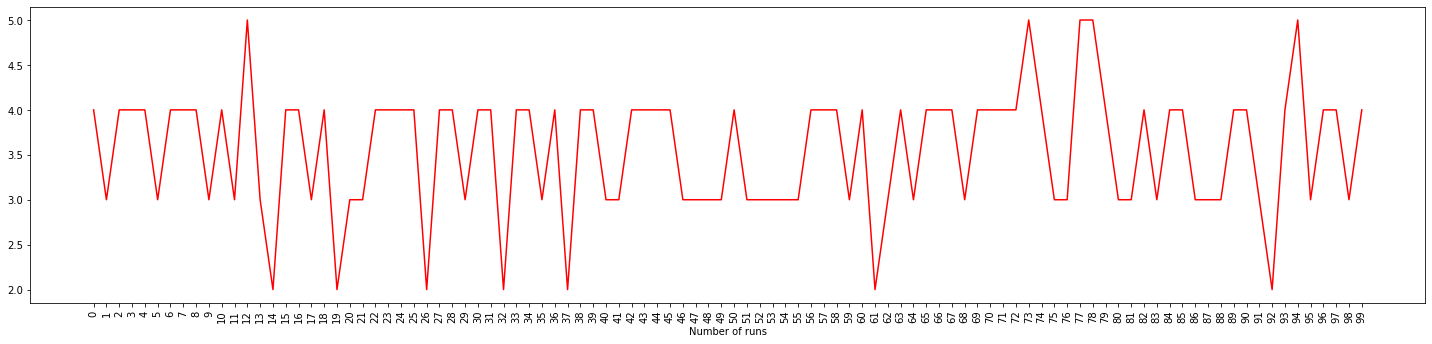

In [14]:
plotCosts(costs)

### Task 2. Genetic Algorithm

<p align="center">
<img src="https://camo.githubusercontent.com/dc01a9bb8b8dfa6b453a25317bce5d9546dc6fa2/68747470733a2f2f6d656469612e67697068792e636f6d2f6d656469612f32364252774e52764d773772335745726d2f67697068792e676966" width="250" height="250" />
</p>
<!--![Nqueens](https://camo.githubusercontent.com/dc01a9bb8b8dfa6b453a25317bce5d9546dc6fa2/68747470733a2f2f6d656469612e67697068792e636f6d2f6d656469612f32364252774e52764d773772335745726d2f67697068792e676966)-->

Implement a Genetic algorithm to find a solution of the N-queens problem. Use the number of pairwise attacks as the objective function. Repeat the program 100 times for N = 8, N = 16, and N = 32 and show how many times you can find the solutions.


***Algorithm***

<p align="center">
<img src="https://media1.giphy.com/media/Aid095ixEDLS8/giphy.gif?cid=790b76119037c2b2f0388fc10810a62fdf9130a0b5f7a980&rid=giphy.gif"  height="250" />


In [15]:
def order1Crossover(x,y):
  #--- make sure len(x) = len(y)
  size = len(x)
  child1 = np.zeros(size)
  child2 = np.zeros(size)
  check1 = np.zeros(size)
  check2 = np.zeros(size)
  seqStart,seqEnd = random.sample(range(size), 2)
  if seqStart > seqEnd:
        seqStart, seqEnd = seqEnd, seqStart
  #print(seqStart,seqEnd)
  #--- populate the child with genetic seq of parent 1 
  # child1[seqStart:seqEnd] = [x[i] for i in range(seqStart,seqEnd)]
  # child2[seqStart:seqEnd] = [y[i] for i in range(seqStart,seqEnd)]
  for i in range(seqStart, seqEnd):
    child1[i] = x[i]
    child2[i] = y[i]
    check1[x[i]-1] = 1
    check2[y[i]-1] = 1
  #print(check1, check2)
  #--- fill in the rest of the child using elements from parent 2
  # copying the remaining genomes sequentially for child1
  i = 0
  index = 0 + ((seqStart == 0) * (seqEnd))
  #print(index)
  while i < size and index < size:
        if not check1[y[i]-1]:
            child1[index] = y[i]
            index += 1
        if index == seqStart:
            index = seqEnd
        i += 1
  # copying the remaining genomes sequentially for child2
  i = 0
  index = 0 + ((seqStart == 0) * (seqEnd))
  while i < size and index < size:
        if not check2[x[i]-1]:
            child2[index] = x[i]
            index += 1
        if index == seqStart:
            index = seqEnd
        i += 1
  child1 = child1.tolist()
  child1 = [int(i) for i in child1]
  child2 = child2.tolist()
  child2 = [int(i) for i in child2]
  return child1

In [18]:
import random

def random_chromosome(size): #making random chromosomes 
    return [ random.randint(1, size) for _ in range(size) ]
"""
Function - fitness(chromosome)
calculates fitness values for each chromosome
"""
def getFitness(chromosome):
    horizontal_collisions = sum([chromosome.count(queen)-1 for queen in chromosome])//2
    diagonal_collisions = 0

    n = len(chromosome)
    left_diagonal = [0] * 2*n
    right_diagonal = [0] * 2*n
    for i in range(n):
        left_diagonal[i + chromosome[i] - 1] += 1
        right_diagonal[len(chromosome) - i + chromosome[i] - 2] += 1

    diagonal_collisions = 0
    for i in range(2*n-1):
        counter = 0
        if left_diagonal[i] > 1:
            counter += left_diagonal[i]-1
        if right_diagonal[i] > 1:
            counter += right_diagonal[i]-1
        diagonal_collisions += counter#/ (n-abs(i-n+1))
        
    return int(horizontal_collisions + diagonal_collisions)
    #return int(maxFitness - (horizontal_collisions + diagonal_collisions)) #28-(2+3)=23

def probability(chromosome, fitness):
    return fitness(chromosome)#/ maxFitness
  
def random_pick(population, probabilities):
  populationWithProbabilty = zip(population, probabilities)
  populationWithProbabilty = sorted(populationWithProbabilty, key=lambda x: x[1])

# def random_pick(population, probabilities):
#     populationWithProbabilty = zip(population, probabilities)
#     total = sum(w for c, w in populationWithProbabilty)
#     #threshold = min([w for c, w in populationWithProbabilty])
#     #avg = int((total/len(population))*100)
#     r = random.uniform(0, total)
#     upto = 0
#     for c, w in zip(population, probabilities):
#         if upto + w >= r:
#             return c
#         upto += w
#     assert False, "Shouldn't get here"
        
def crossover(x, y): #doing cross_over between two chromosomes
    n = len(x)
    c = random.randint(0, n - 1)
    return x[0:c] + y[c:n]

# def mutate(x):  #randomly changing the value of a random index of a chromosome
#     n = len(x)
#     c = random.randint(0, n - 1)
#     m = random.randint(1, n)
#     x[c] = m
#     return x

def mutate(type, x):
  n = len(x)
  c,m = random.sample(range(n), 2)
  if(type=="INSERT"):
      x
  if(type=="SWAP"):
      x[c],x[m] = x[m],x[c]
      return x
  if(type=="INVERSION"):
      seq = random.randint(1, n//2)
  if(type=="SCRAMBLE"):
      seq = random.randint(1, n//2)


def genetic_queen(population, fitness):
    #maxFitness = 28
    minFitness = 0
    mutation_probability = 0.03
    POPULATION_SIZE = len(population)
    new_population = []
    population = sorted(population, key = lambda x:fitness(x))
    #print(population)#--- sort the population inascending order
    probabilities = [probability(n, fitness) for n in population]
    if fitness(population[0]) <= minFitness:
      new_population.append(population[0])
      return new_population
    # Perform Elitism, that mean 10% of fittest population goes to the next generation 
    s = int((10*POPULATION_SIZE)/100) 
    new_population.extend(population[:s])
    
    # From 50% of fittest population, Individuals will mate to produce offspring 
    s = int((90*POPULATION_SIZE)/100) 
    for i in range(s):
        #x = random_pick(population, probabilities) #best chromosome 1
        #y = random_pick(population, probabilities) #best chromosome 2
        x = random.choice(population[:50]) #best chromosome 1
        y = random.choice(population[:50]) #best chromosome 2
        child = crossover(x, y) #creating two new chromosomes from the best 2 chromosomes
#         if random.random() < mutation_probability:
#             child = mutate("SWAP",child)
        child = mutate("SWAP",child)
        print_chromosome(child)
        new_population.append(child)
    return new_population

def print_chromosome(chrom):
    print("Chromosome = {},  Fitness = {}"
        .format(str(chrom), getFitness(chrom)))
    
def print_board(chromosome):
  nq = len(chromosome)
  print(nq)
  board = []
  for x in range(nq):
    board.append(["x"] * nq)    
  for i in range(nq):
    #print(i)
    board[nq-chromosome[i]][i]="Q"
  for row in board:
            print (" ".join(row))

if __name__ == "__main__":
    nq = int(input("Enter Number of Queens: ")) #say N = 8
    maxFitness = (nq*(nq-1))/2  # 8*7/2 = 28
    population = [random_chromosome(nq) for _ in range(100)]
    minFitness = 0
    costs = []
    generation = 1

    while not minFitness in [getFitness(chrom) for chrom in population]:
    #while generation < 101 :
        print("=== Generation {} ===".format(generation))
        population = genetic_queen(population, getFitness)
        print("")
        print("Minimum Fitness = {}".format(min([getFitness(n) for n in population])))
        costs.append(min([getFitness(n) for n in population])) #--- append fitness costs of each generation
        print("Population Size = {}".format(len(population)))
        if generation == 100:
          break
        generation += 1
    chrom_out = []
    print("Solved in Generation {}!".format(generation-1))
    for chrom in population:
        if getFitness(chrom) == minFitness:
            #maxFitness = fitness(chrom)
            print("");
            print("One of the solutions: ")
            chrom_out = chrom
            print_chromosome(chrom)
    print()
    print_board(chrom_out)

Enter Number of Queens:  8


=== Generation 1 ===
Chromosome = [7, 8, 2, 1, 8, 2, 7, 4],  Fitness = 7
Chromosome = [7, 8, 8, 5, 2, 7, 4, 1],  Fitness = 7
Chromosome = [6, 7, 1, 4, 7, 5, 8, 5],  Fitness = 3
Chromosome = [4, 6, 6, 1, 8, 7, 2, 1],  Fitness = 8
Chromosome = [6, 7, 6, 7, 2, 3, 1, 7],  Fitness = 10
Chromosome = [6, 3, 6, 7, 6, 2, 4, 4],  Fitness = 9
Chromosome = [2, 2, 4, 1, 1, 1, 6, 7],  Fitness = 7
Chromosome = [7, 2, 8, 3, 5, 2, 8, 1],  Fitness = 4
Chromosome = [6, 7, 5, 1, 7, 2, 4, 8],  Fitness = 5
Chromosome = [8, 5, 4, 4, 1, 3, 6, 3],  Fitness = 4
Chromosome = [1, 7, 6, 1, 4, 8, 6, 1],  Fitness = 8
Chromosome = [7, 4, 6, 8, 1, 5, 2, 8],  Fitness = 3
Chromosome = [5, 6, 8, 1, 8, 7, 5, 6],  Fitness = 6
Chromosome = [3, 4, 6, 3, 3, 2, 7, 8],  Fitness = 6
Chromosome = [4, 8, 6, 6, 3, 7, 1, 5],  Fitness = 5
Chromosome = [1, 3, 7, 5, 3, 1, 2, 2],  Fitness = 7
Chromosome = [3, 2, 8, 7, 5, 7, 5, 7],  Fitness = 7
Chromosome = [4, 8, 6, 4, 4, 7, 1, 1],  Fitness = 8
Chromosome = [7, 4, 7, 1, 8, 7, 8, 4],  Fi

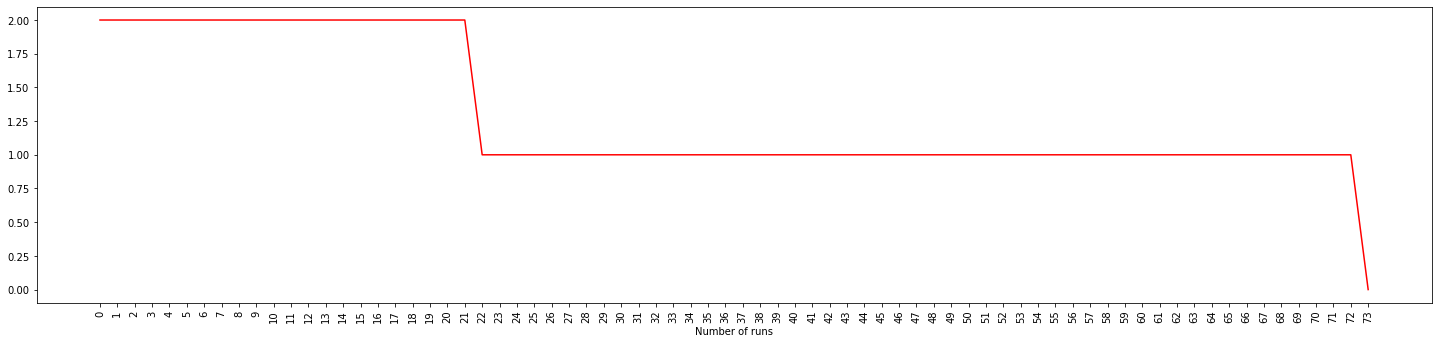

In [19]:
32#--- plotting the costs
plotCosts(costs)

## Analysis

1. Implemented a hill climbing algorithm to find minimum of egg holder function.
    - Will find a minimum but not necessarily a global one
    - will have to increase the number of iterations to find next best minimum
2. Implemented a differential evolution function to find the global minimum of the egg holder function.
    - efficient way to find a global minimum, as it finds minimum value better than hill climbing.
3. solving n-queens problem using hill climbing.
    - using hill climbing, there is a probability that it fails for 86% to find a solution in 100 iterations for 8-queens problem, may find a minimum if we increase the number of iterations.
    - for 16 queens and more it might take more time to converge to the minimum
4. solving n-queens problem using genetic algorithm.
    - for 8 queens genetic algorithm find solutions for every randomly generated state in 100 iterations, but for N- queens we might need to increase the number of iterations.
    
### Learning Outcomes

1. We can see that hill climbing is a greedy algorithm where it only tries to find minimum everytime, might stuck in a local minimum as it does not validate whether the minimum is a local or global,we need to tweak the learning rate to get better performance in a hillclimbing algorithm. 

2. On the other hand genetic algorithm gives us and upper hand in solving puzzles as it gives an optimum solution most of the time. hyper parameters for genetic algorithm are the population size and the fitness function which can be tweaked to improve the performance.

3. Genetic algorithm may be good in solving puzzles, But as the size increases it is hard to compute the fitness for a large population, parallel computing may come to the rescue in such cases.